# Correlation and Income Analysis

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import io, s3fs, json, traceback
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from IPython.display import display
print('Program run at', dt.now())

Program run at 2021-06-08 19:11:44.009616


In [2]:
est = pd.read_csv('s3://bleeding-hearts/workingdata/merge_est.csv')
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Columns: 148 entries, Unnamed: 0 to Child Opportunity Scores, overall COI, nationally-normed
dtypes: float64(1), int64(143), object(4)
memory usage: 20.6+ MB


In [3]:
est.drop(columns=['Unnamed: 0'],inplace=True)
cols=list(est)
all_miss = []
for c in cols:
    if est[c].dtypes != object:
        est.loc[est[c] < 0, c] = np.nan
    if len(est) - est[c].count() == len(est):
        all_miss.append(c)
est.drop(columns=all_miss,inplace=True)
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Columns: 127 entries, EMPLOYMENT STATUS_Population 16 years and over to Child Opportunity Scores, overall COI, nationally-normed
dtypes: float64(123), object(4)
memory usage: 17.6+ MB


In [4]:
def assess_missing(df):
    missing_dict = {}
    cols=list(df)
    for c in cols:
        if len(df) - df[c].count() > 0:
             missing_dict[c] = ((len(df) - df[c].count())/len(df))*100
    return missing_dict

In [5]:
est_missing = assess_missing(est)
est_missing

{'COMMUTING TO WORK_Mean travel time to work (minutes)': 0.35149384885764495,
 'INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)_Total households_Median household income (dollars)': 0.19771528998242532,
 'INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)_Total households_Mean household income (dollars)': 0.21968365553602814,
 'INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)_With earnings_Mean earnings (dollars)': 0.2251757469244288,
 'INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)_With Social Security_Mean Social Security income (dollars)': 0.5437170474516696,
 'INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)_With retirement income_Mean retirement income (dollars)': 0.8018453427065025,
 'INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)_With Supplemental Security Income_Mean Supplemental Security Income (dollars)': 10.209797891036906,
 'INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)_With cash public assistance income_Mean cash

In [6]:
#remove COI columns except for target: Child Opportunity Levels, overall COI, nationally-normed
cols=list(est)
coi_cols=cols[-8:]
coi_cols.remove('Child Opportunity Levels, overall COI, nationally-normed')
clean_cols = [i for i in cols if i not in coi_cols]
est = est[clean_cols]
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Columns: 120 entries, EMPLOYMENT STATUS_Population 16 years and over to Child Opportunity Levels, overall COI, nationally-normed
dtypes: float64(119), object(1)
memory usage: 16.7+ MB


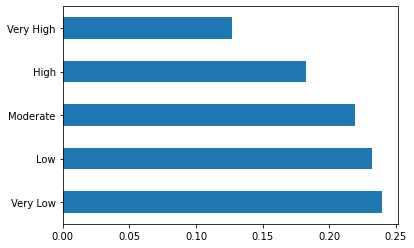

In [7]:
est['Child Opportunity Levels, overall COI, nationally-normed'].value_counts(normalize=True)
#plot the bar graph of percentage job categories
est['Child Opportunity Levels, overall COI, nationally-normed'].value_counts(normalize=True).plot.barh()
plt.show()

In [8]:
#get categories of ACS variables
cols=list(est)
cats = [i.split('_')[0] for i in cols]
cats = list(set(cats))
not_acs = ['Child Opportunity Levels, overall COI, nationally-normed','year','FIPS']
for i in not_acs:
    cats.remove(i)
for i in cats:
    print(i)

EMPLOYMENT STATUS
OCCUPATION
INDUSTRY
INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)
CLASS OF WORKER
HEALTH INSURANCE COVERAGE
COMMUTING TO WORK


/Users/sarahmartin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


EMPLOYMENT STATUS


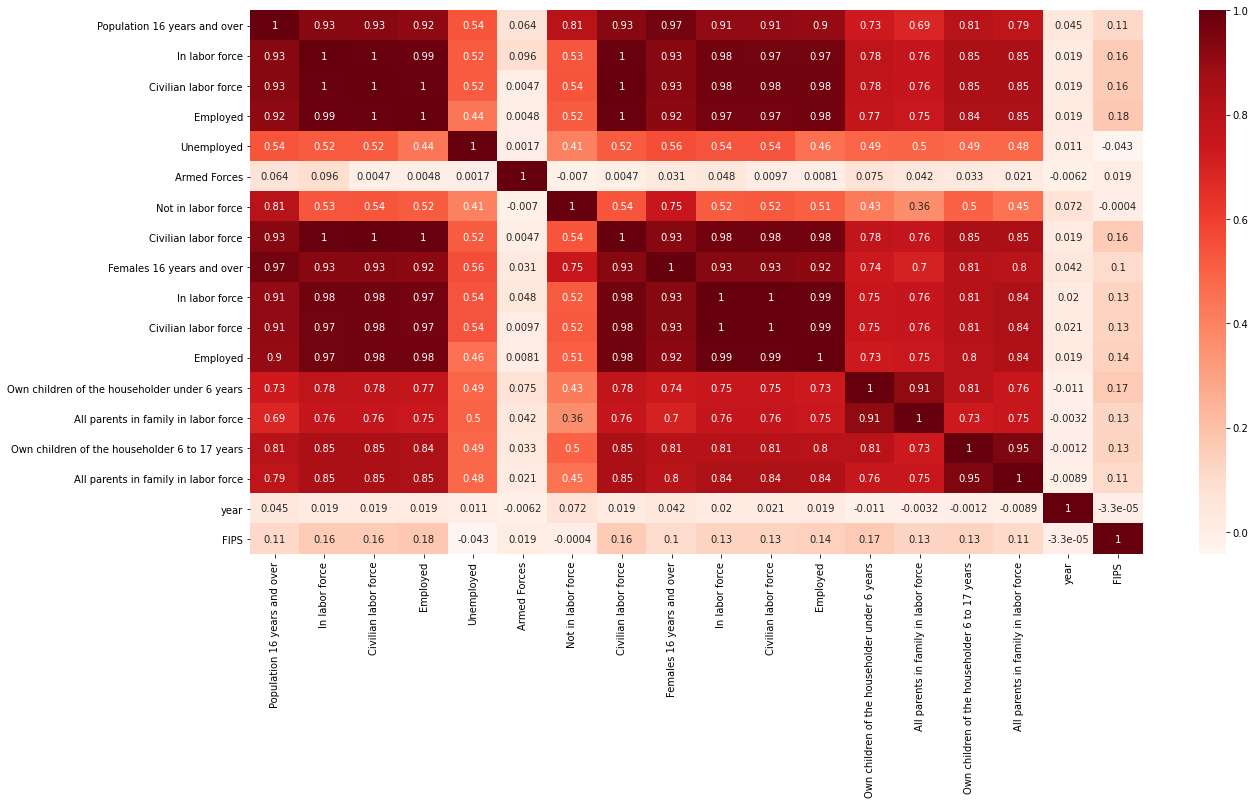

,Population 16 years and over,In labor force,Civilian labor force,Employed,Unemployed,Armed Forces,Not in labor force,Civilian labor force,Females 16 years and over,In labor force,Civilian labor force,Employed,Own children of the householder under 6 years,All parents in family in labor force,Own children of the householder 6 to 17 years,All parents in family in labor force,year,FIPS
Population 16 years and over,1.000000,0.929237,0.927699,0.917503,0.538288,0.063576,0.808299,0.927699,0.973647,0.908523,0.907168,0.899886,0.730876,0.688334,0.807894,0.788220,0.044616,0.114273
In labor force,0.929237,1.000000,0.995847,0.991404,0.519082,0.095726,0.533560,0.995847,0.929201,0.976641,0.974033,0.971843,0.782879,0.760651,0.846926,0.851149,0.018804,0.164404
Civilian labor force,0.927699,0.995847,1.000000,0.995530,0.521318,0.004703,0.536656,1.000000,0.930655,0.976718,0.977633,0.975579,0.779618,0.760339,0.847829,0.853122,0.019455,0.163468
Employed,0.917503,0.991404,0.995530,1.000000,0.438395,0.004769,0.520398,0.995530,0.918616,0.968909,0.969815,0.976495,0.766485,0.745807,0.839139,0.845000,0.019328,0.176876
Unemployed,0.538288,0.519082,0.521318,0.438395,1.000000,0.001664,0.405006,0.521318,0.556364,0.540292,0.540817,0.460913,0.493609,0.496979,0.486270,0.483674,0.010501,-0.042536
Armed Forces,0.063576,0.095726,0.004703,0.004769,0.001664,1.000000,-0.007012,0.004703,0.030850,0.048301,0.009652,0.008056,0.075044,0.041684,0.032748,0.021263,-0.006165,0.018507
Not in labor force,0.808299,0.533560,0.536656,0.520398,0.405006,-0.007012,1.000000,0.536656,0.748035,0.523367,0.524420,0.511242,0.425486,0.363525,0.499725,0.447960,0.072162,-0.000403
Civilian labor force,0.927699,0.995847,1.000000,0.995530,0.521318,0.004703,0.536656,1.000000,0.930655,0.976718,0.977633,0.975579,0.779618,0.760339,0.847829,0.853122,0.019455,0.163468
Females 16 years and over,0.973647,0.929201,0.930655,0.918616,0.556364,0.030850,0.748035,0.930655,1.000000,0.931865,0.931763,0.921835,0.736705,0.703150,0.812588,0.798818,0.041923,0.103854
In labor force,0.908523,0.976641,0.976718,0.968909,0.540292,0.048301,0.523367,0.976718,0.931865,1.000000,0.999152,0.992929,0.751331,0.762490,0.814036,0.844474,0.020347,0.133440


/Users/sarahmartin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


OCCUPATION


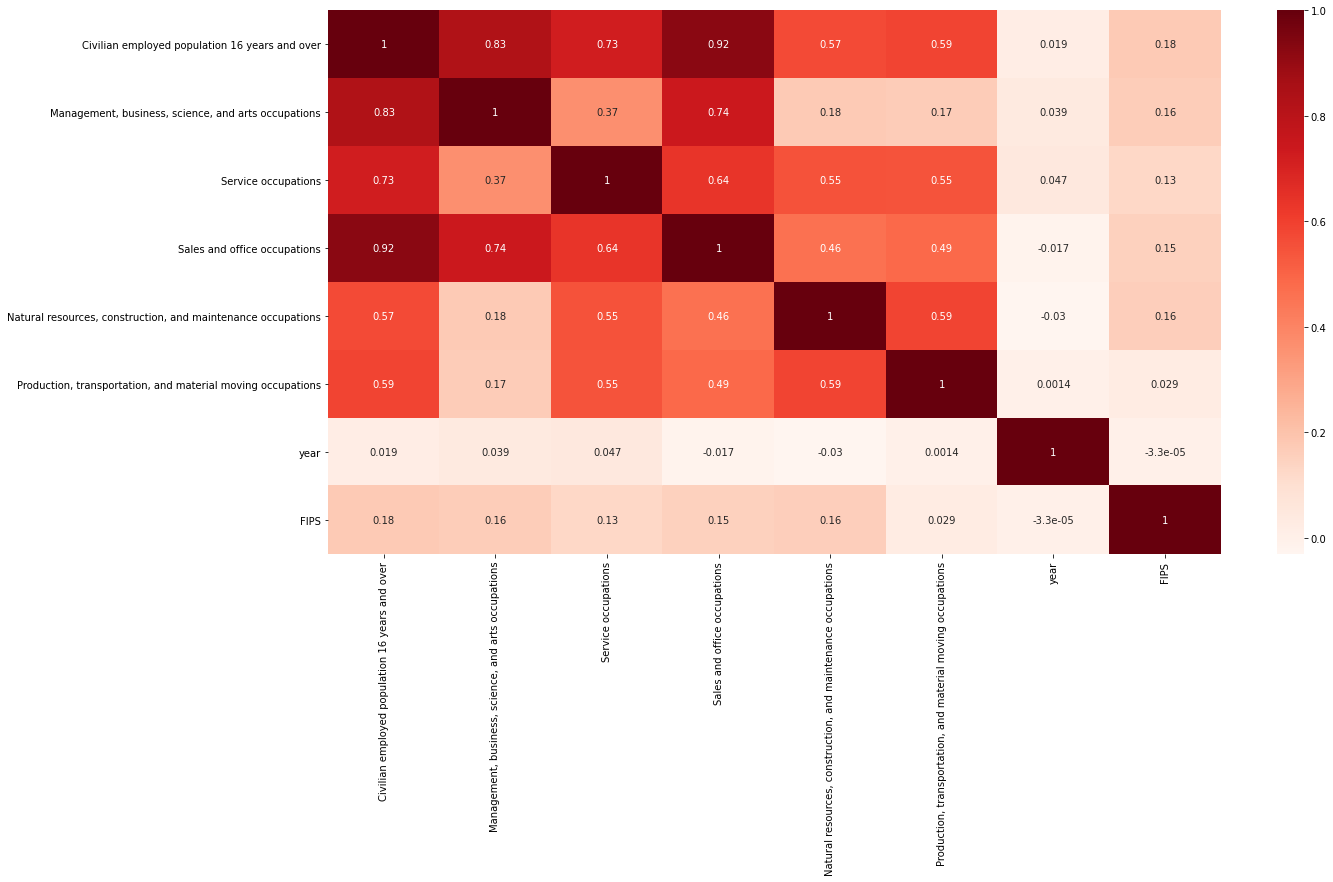

,Civilian employed population 16 years and over,"Management, business, science, and arts occupations",Service occupations,Sales and office occupations,"Natural resources, construction, and maintenance occupations","Production, transportation, and material moving occupations",year,FIPS
Civilian employed population 16 years and over,1.000000,0.834264,0.726179,0.924439,0.570677,0.585951,0.019328,0.176876
"Management, business, science, and arts occupations",0.834264,1.000000,0.365503,0.739633,0.178150,0.170224,0.038756,0.163068
Service occupations,0.726179,0.365503,1.000000,0.640488,0.550504,0.548924,0.046902,0.127354
Sales and office occupations,0.924439,0.739633,0.640488,1.000000,0.464640,0.486472,-0.017158,0.151706
"Natural resources, construction, and maintenance occupations",0.570677,0.178150,0.550504,0.464640,1.000000,0.587019,-0.030436,0.162413
"Production, transportation, and material moving occupations",0.585951,0.170224,0.548924,0.486472,0.587019,1.000000,0.001352,0.029119
year,0.019328,0.038756,0.046902,-0.017158,-0.030436,0.001352,1.000000,-0.000033
FIPS,0.176876,0.163068,0.127354,0.151706,0.162413,0.029119,-0.000033,1.000000


/Users/sarahmartin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


INDUSTRY


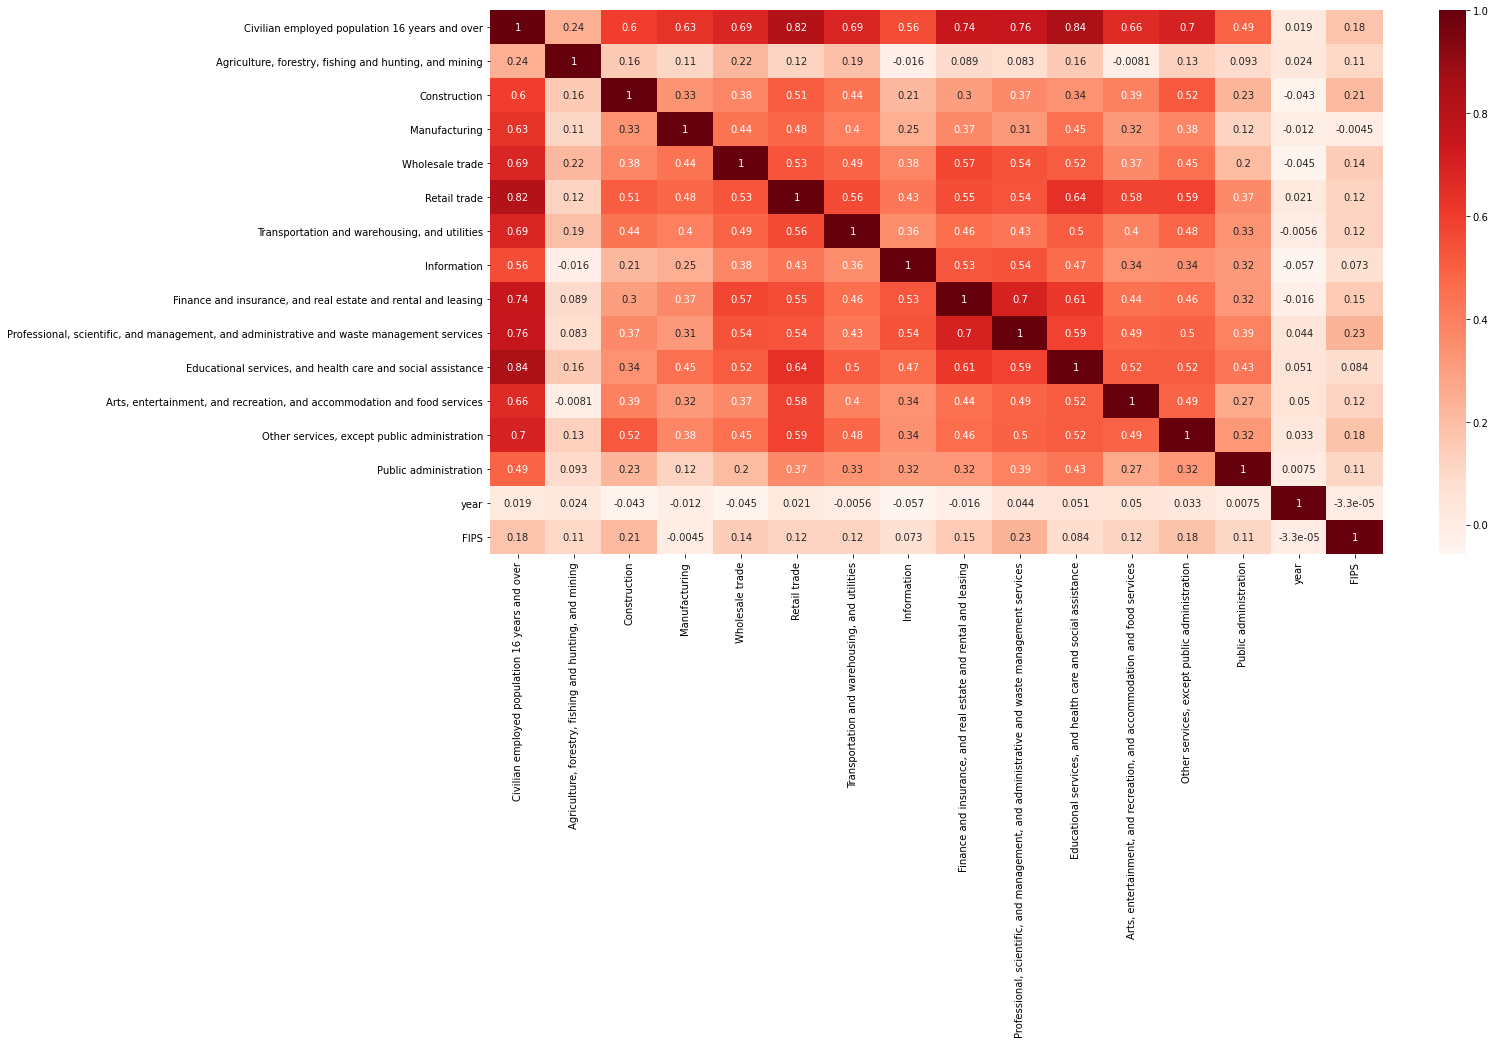

,Civilian employed population 16 years and over,"Agriculture, forestry, fishing and hunting, and mining",Construction,Manufacturing,Wholesale trade,Retail trade,"Transportation and warehousing, and utilities",Information,"Finance and insurance, and real estate and rental and leasing","Professional, scientific, and management, and administrative and waste management services","Educational services, and health care and social assistance","Arts, entertainment, and recreation, and accommodation and food services","Other services, except public administration",Public administration,year,FIPS
Civilian employed population 16 years and over,1.000000,0.244407,0.596345,0.633280,0.685352,0.821571,0.686498,0.556182,0.743986,0.760156,0.841478,0.664898,0.700595,0.491289,0.019328,0.176876
"Agriculture, forestry, fishing and hunting, and mining",0.244407,1.000000,0.157120,0.109034,0.215595,0.119503,0.192072,-0.016015,0.089273,0.082735,0.155084,-0.008063,0.131005,0.092942,0.024212,0.105921
Construction,0.596345,0.157120,1.000000,0.332525,0.383542,0.508069,0.437360,0.214900,0.300997,0.367474,0.343209,0.393486,0.518090,0.225647,-0.043209,0.209168
Manufacturing,0.633280,0.109034,0.332525,1.000000,0.436163,0.482081,0.398143,0.246496,0.366338,0.314596,0.453702,0.317804,0.378932,0.118535,-0.011573,-0.004479
Wholesale trade,0.685352,0.215595,0.383542,0.436163,1.000000,0.530347,0.489171,0.382660,0.574191,0.541059,0.515160,0.365483,0.453422,0.204985,-0.044705,0.144269
Retail trade,0.821571,0.119503,0.508069,0.482081,0.530347,1.000000,0.559638,0.426025,0.554149,0.535638,0.642672,0.579212,0.586337,0.368193,0.020554,0.117800
"Transportation and warehousing, and utilities",0.686498,0.192072,0.437360,0.398143,0.489171,0.559638,1.000000,0.357145,0.458035,0.429623,0.504811,0.396811,0.480055,0.332133,-0.005621,0.121417
Information,0.556182,-0.016015,0.214900,0.246496,0.382660,0.426025,0.357145,1.000000,0.528448,0.537724,0.466447,0.343004,0.344135,0.315821,-0.057122,0.072648
"Finance and insurance, and real estate and rental and leasing",0.743986,0.089273,0.300997,0.366338,0.574191,0.554149,0.458035,0.528448,1.000000,0.697258,0.613845,0.444682,0.460091,0.321939,-0.015839,0.150244
"Professional, scientific, and management, and administrative and waste management services",0.760156,0.082735,0.367474,0.314596,0.541059,0.535638,0.429623,0.537724,0.697258,1.000000,0.586536,0.485798,0.496027,0.392288,0.043983,0.231612


/Users/sarahmartin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)


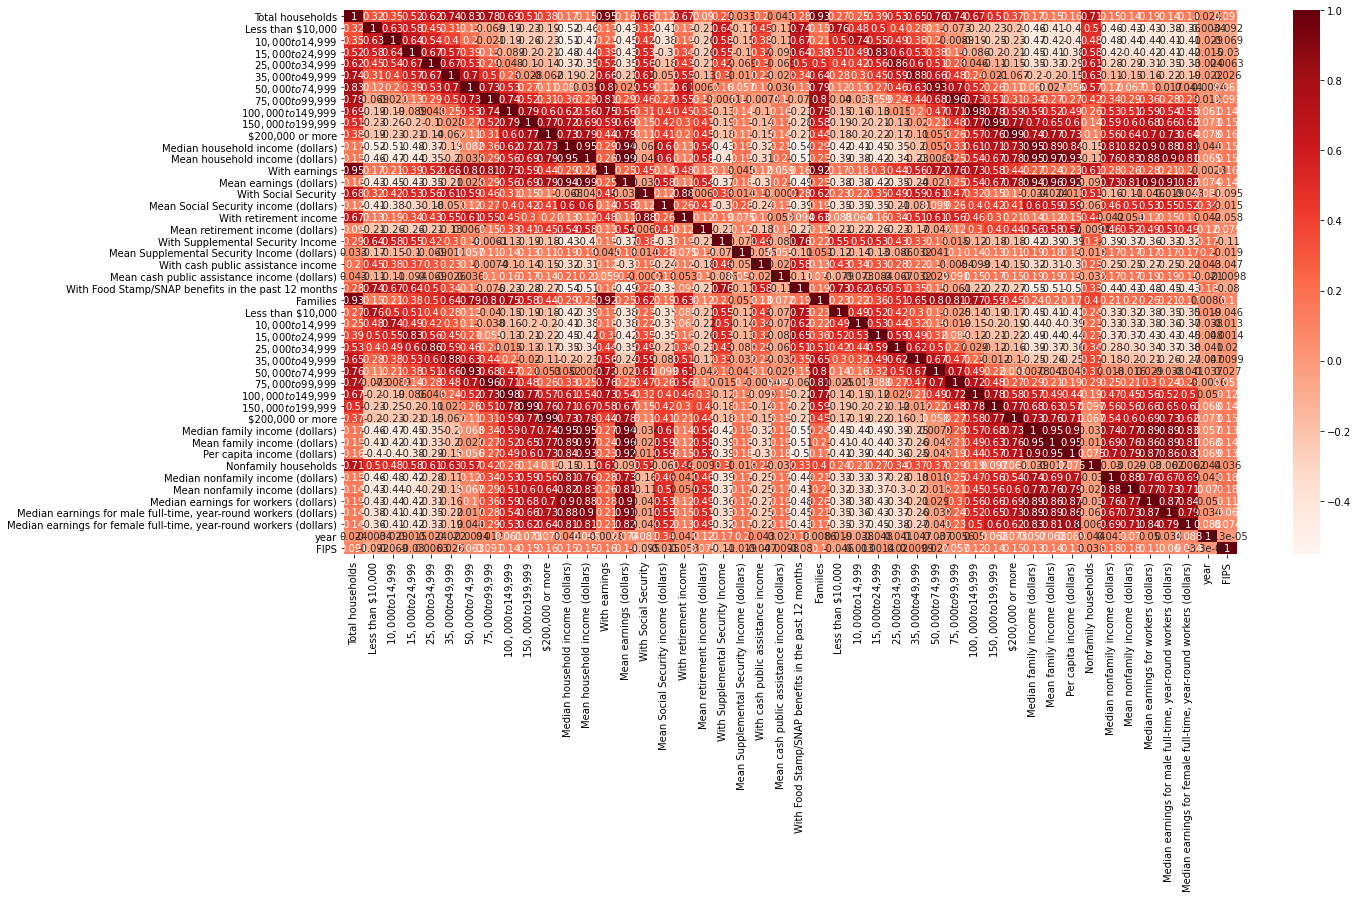

,Total households,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 or more",Median household income (dollars),Mean household income (dollars),With earnings,Mean earnings (dollars),With Social Security,Mean Social Security income (dollars),With retirement income,Mean retirement income (dollars),With Supplemental Security Income,Mean Supplemental Security Income (dollars),With cash public assistance income,Mean cash public assistance income (dollars),With Food Stamp/SNAP benefits in the past 12 months,Families,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 or more",Median family income (dollars),Mean family income (dollars),Per capita income (dollars),Nonfamily households,Median nonfamily income (dollars),Mean nonfamily income (dollars),Median earnings for workers (dollars),"Median earnings for male full-time, year-round workers (dollars)","Median earnings for female full-time, year-round workers (dollars)",year,FIPS
Total households,1.000000,0.315598,0.349984,0.521700,0.624777,0.740473,0.834144,0.782754,0.687201,0.506610,0.379568,0.167126,0.154464,0.951809,0.156842,0.680321,0.121998,0.665240,0.089536,0.288941,0.032615,0.197142,0.042923,0.276913,0.932305,0.269028,0.248883,0.386685,0.527983,0.647997,0.762343,0.741584,0.669047,0.495184,0.371810,0.169582,0.152278,0.158468,0.706260,0.148620,0.141344,0.185752,0.141371,0.136135,0.024177,0.091238
"Less than $10,000",0.315598,1.000000,0.629996,0.581732,0.454728,0.311128,0.122670,-0.068600,-0.194375,-0.228294,-0.191552,-0.515820,-0.458581,0.170290,-0.431428,0.322305,-0.412424,0.133467,-0.214251,0.640756,-0.169246,0.446599,-0.107844,0.743706,0.151811,0.762112,0.483755,0.504749,0.398697,0.276353,0.107645,-0.072712,-0.197220,-0.229279,-0.195705,-0.463634,-0.407931,-0.402025,0.501676,-0.463435,-0.427290,-0.434999,-0.375687,-0.361032,-0.003408,-0.092275
"$10,000 to $14,999",0.349984,0.629996,1.000000,0.636393,0.536199,0.399565,0.199676,-0.020759,-0.193868,-0.256635,-0.232555,-0.512809,-0.465298,0.206833,-0.445391,0.419890,-0.375661,0.194739,-0.262943,0.580418,-0.151328,0.380409,-0.106666,0.665107,0.206363,0.500703,0.739800,0.551138,0.485532,0.384429,0.205136,-0.008938,-0.188769,-0.253094,-0.234528,-0.467448,-0.423299,-0.403781,0.481931,-0.482647,-0.443938,-0.442104,-0.409896,-0.409691,-0.029028,-0.068513
"$15,000 to $24,999",0.521700,0.581732,0.636393,1.000000,0.674265,0.573274,0.385169,0.133965,-0.088655,-0.197364,-0.209683,-0.483653,-0.443268,0.386310,-0.433229,0.530901,-0.301582,0.338298,-0.263096,0.545522,-0.104180,0.366979,-0.094488,0.639466,0.377236,0.509845,0.493216,0.826104,0.602725,0.532108,0.375687,0.136871,-0.085916,-0.196877,-0.212267,-0.454439,-0.413583,-0.381714,0.582105,-0.423462,-0.404136,-0.423645,-0.409593,-0.415490,-0.015290,-0.030335
"$25,000 to $34,999",0.624777,0.454728,0.536199,0.674265,1.000000,0.668484,0.534250,0.292454,0.048044,-0.104297,-0.143464,-0.367553,-0.345132,0.520876,-0.347837,0.555671,-0.182584,0.428900,-0.212362,0.417743,-0.068556,0.303024,-0.069278,0.501053,0.495496,0.403766,0.416315,0.562712,0.857373,0.604285,0.506011,0.281231,0.045821,-0.105466,-0.146853,-0.354280,-0.326820,-0.286672,0.611527,-0.279954,-0.293758,-0.314967,-0.345635,-0.329255,-0.023713,0.006348
"$35,000 to $49,999",0.740473,0.311128,0.399565,0.573274,0.668484,1.000000,0.699318,0.500529,0.245437,0.027659,-0.061750,-0.193359,-0.202337,0.659070,-0.211227,0.610201,-0.050835,0.550106,-0.129757,0.302388,-0.011222,0.231274,-0.025992,0.340442,0.637835,0.282605,0.297486,0.453827,0.591853,0.884266,0.657205,0.480304,0.237754,0.021018,-0.067090,-0.196871,-0.195722,-0.153570,0.625755,-0.110798,-0.150774,-0.156417,-0.218808,-0.194404,-0.022130,0.025626
"$50,000 to $74,999",0.834144,0.122670,0.199676

/Users/sarahmartin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


CLASS OF WORKER


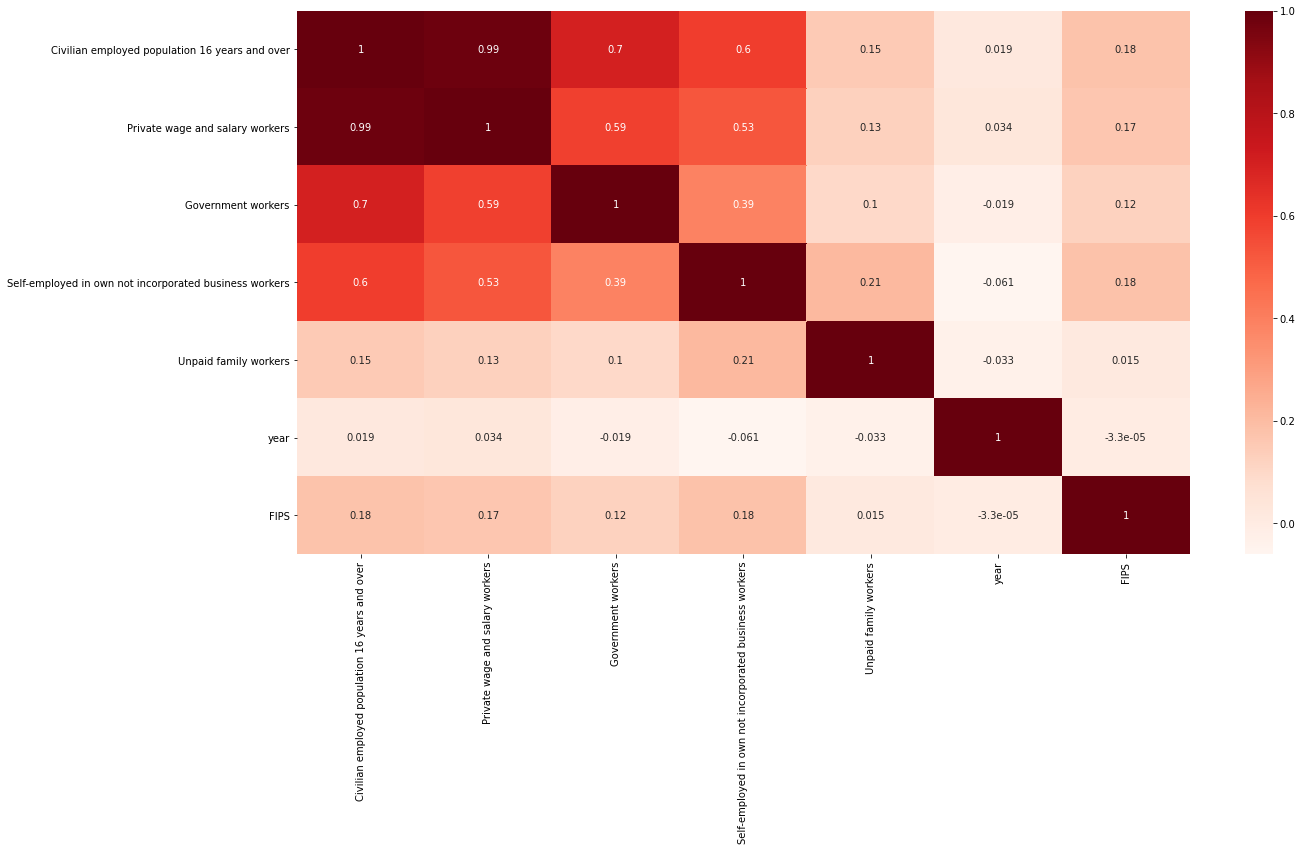

,Civilian employed population 16 years and over,Private wage and salary workers,Government workers,Self-employed in own not incorporated business workers,Unpaid family workers,year,FIPS
Civilian employed population 16 years and over,1.000000,0.985226,0.703276,0.595609,0.152491,0.019328,0.176876
Private wage and salary workers,0.985226,1.000000,0.586884,0.526129,0.129463,0.033763,0.166595
Government workers,0.703276,0.586884,1.000000,0.388293,0.100994,-0.018672,0.124400
Self-employed in own not incorporated business workers,0.595609,0.526129,0.388293,1.000000,0.209046,-0.060571,0.181423
Unpaid family workers,0.152491,0.129463,0.100994,0.209046,1.000000,-0.032919,0.014961
year,0.019328,0.033763,-0.018672,-0.060571,-0.032919,1.000000,-0.000033
FIPS,0.176876,0.166595,0.124400,0.181423,0.014961,-0.000033,1.000000


/Users/sarahmartin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


HEALTH INSURANCE COVERAGE


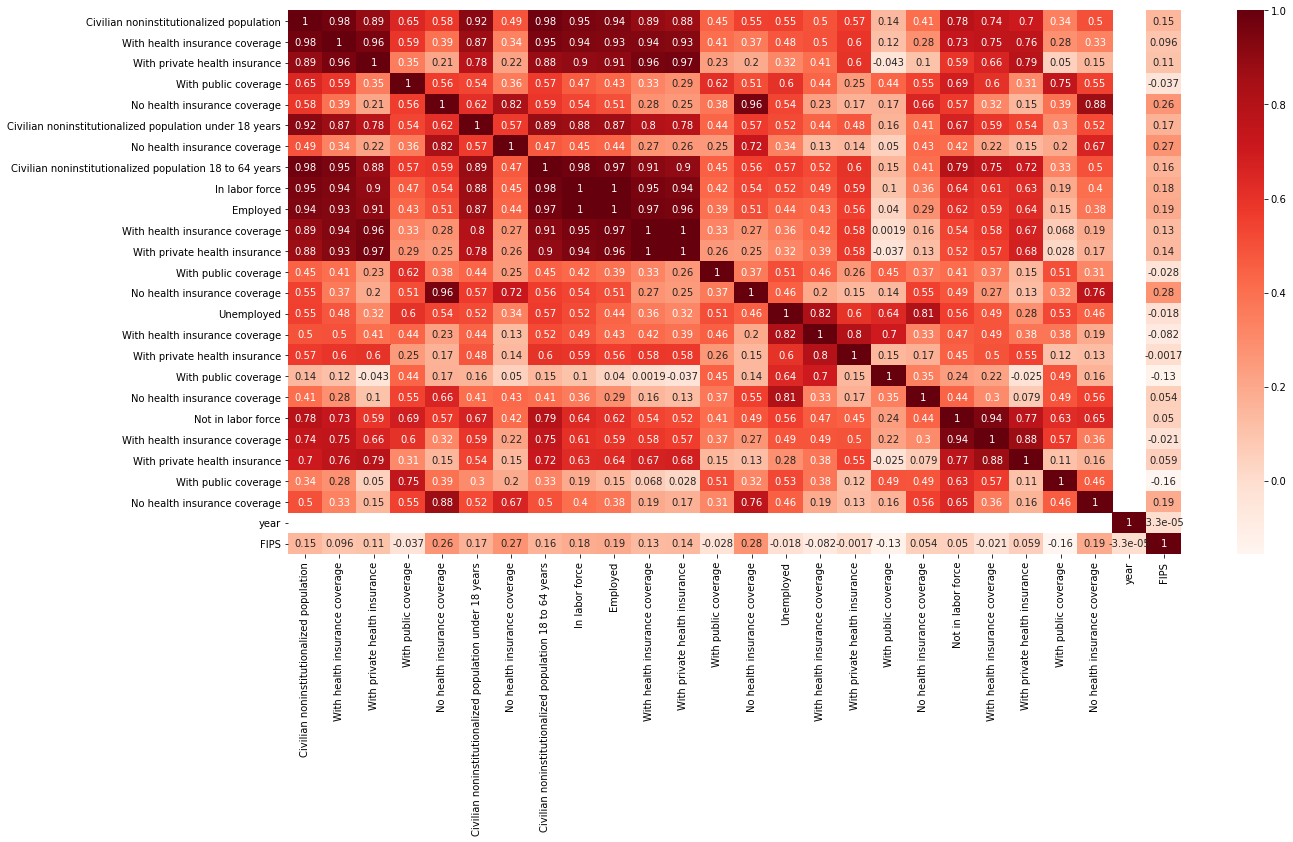

,Civilian noninstitutionalized population,With health insurance coverage,With private health insurance,With public coverage,No health insurance coverage,Civilian noninstitutionalized population under 18 years,No health insurance coverage,Civilian noninstitutionalized population 18 to 64 years,In labor force,Employed,With health insurance coverage,With private health insurance,With public coverage,No health insurance coverage,Unemployed,With health insurance coverage,With private health insurance,With public coverage,No health insurance coverage,Not in labor force,With health insurance coverage,With private health insurance,With public coverage,No health insurance coverage,year,FIPS
Civilian noninstitutionalized population,1.000000,0.975708,0.893208,0.651318,0.584155,0.917981,0.491980,0.979963,0.954161,0.944158,0.892445,0.876823,0.448958,0.550195,0.554425,0.495404,0.566552,0.144480,0.407766,0.784115,0.741477,0.703698,0.344700,0.503517,NaN,0.147237
With health insurance coverage,0.975708,1.000000,0.956610,0.586463,0.392154,0.874334,0.335096,0.952217,0.936823,0.933397,0.936382,0.925650,0.406661,0.365180,0.483419,0.500638,0.597166,0.117095,0.284611,0.733746,0.753508,0.756523,0.284410,0.334057,NaN,0.095556
With private health insurance,0.893208,0.956610,1.000000,0.351692,0.206489,0.782451,0.222537,0.881933,0.897150,0.909315,0.960826,0.965647,0.233968,0.195204,0.315773,0.406248,0.600444,-0.042828,0.104087,0.593792,0.662987,0.787554,0.049973,0.148064,NaN,0.105565
With public coverage,0.651318,0.586463,0.351692,1.000000,0.562131,0.536931,0.359901,0.566886,0.471157,0.431575,0.328900,0.286280,0.619018,0.512588,0.603853,0.439314,0.246243,0.439007,0.547658,0.688798,0.604709,0.305260,0.747938,0.549488,NaN,-0.037025
No health insurance coverage,0.584155,0.392154,0.206489,0.562131,1.000000,0.615334,0.824345,0.587048,0.535740,0.506432,0.278229,0.252392,0.378557,0.957334,0.537041,0.225417,0.166544,0.172855,0.657769,0.574083,0.321833,0.152028,0.393702,0.876641,NaN,0.264227
Civilian noninstitutionalized population under 18 years,0.917981,0.874334,0.782451,0.536931,0.615334,1.000000,0.568737,0.887060,0.877213,0.866891,0.800412,0.783670,0.437283,0.567924,0.520440,0.441813,0.481253,0.157352,0.406756,0.670461,0.592907,0.542341,0.302574,0.524984,NaN,0.166205
No health insurance coverage,0.491980,0.335096,0.222537,0.359901,0.824345,0.568737,1.000000,0.474851,0.449752,0.436962,0.271516,0.256651,0.254177,0.722108,0.338278,0.130519,0.139365,0.050188,0.426169,0.416617,0.220888,0.147133,0.195205,0.665300,NaN,0.273614
Civilian noninstitutionalized population 18 to 64 years,0.979963,0.952217,0.881933,0.566886,0.587048,0.887060,0.474851,1.000000,0.977477,0.967033,0.914220,0.898543,0.452337,0.563021,0.569846,0.521433,0.599320,0.147579,0.406456,0.789069,0.748142,0.718932,0.328192,0.502148,NaN,0.160116
In labor force,0.954161,0.936823,0.897150,0.471157,0.535740,0.877213,0.449752,0.977477,1.000000,0.995971,0.954917,0.942266,0.423891,0.535804,0.519556,0.490380,0.593041,0.102684,0.355131,0.641653,0.609999,0.633199,0.193484,0.404595,NaN,0.182770
Employed,0.944158,0.933397,0.909315,0.431575,0.506432,0.866891,0.436962,0.967033,0.995971,1.000000,0.965745,0.956036,0.391763,0.514962,0.440843,0.428845,0.559903,0.040251,0.288153,0.615423,0.589758,0.635498,0.147748,0.377264,NaN,0.193928


/Users/sarahmartin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


COMMUTING TO WORK


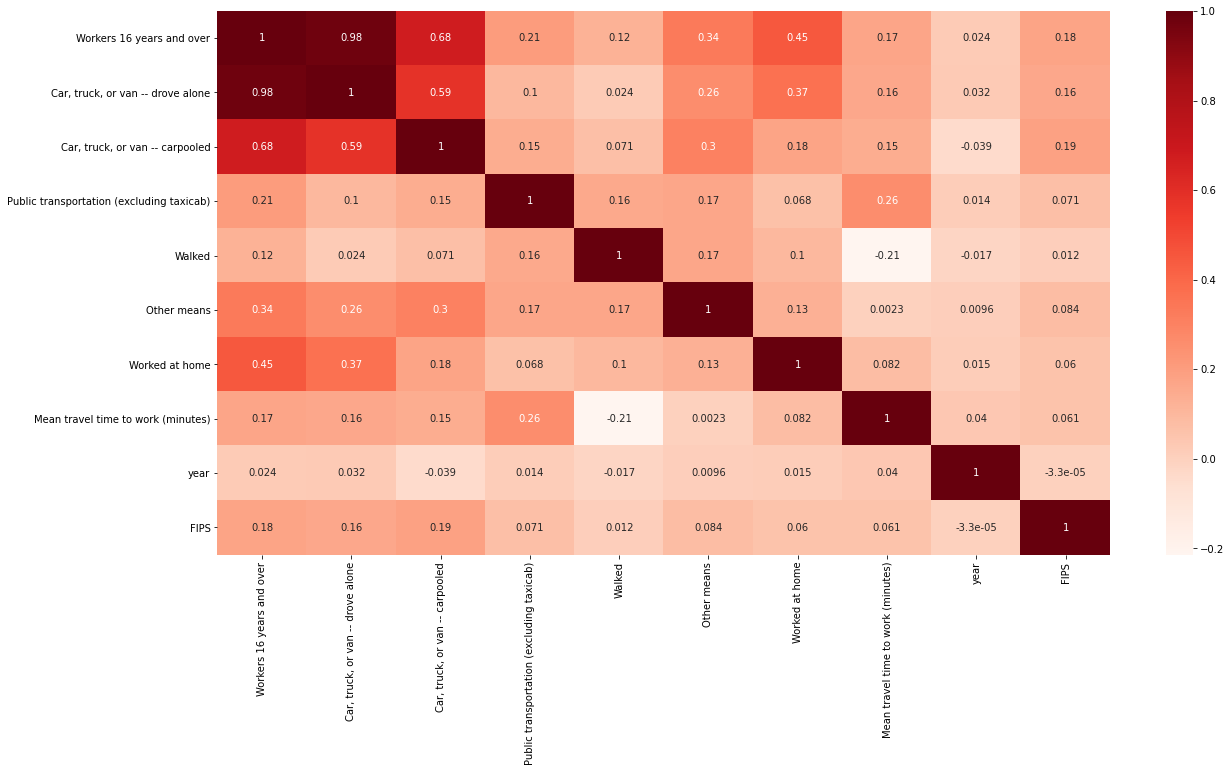

,Workers 16 years and over,"Car, truck, or van -- drove alone","Car, truck, or van -- carpooled",Public transportation (excluding taxicab),Walked,Other means,Worked at home,Mean travel time to work (minutes),year,FIPS
Workers 16 years and over,1.000000,0.979753,0.677637,0.207012,0.122952,0.335073,0.450048,0.173743,0.023617,0.179174
"Car, truck, or van -- drove alone",0.979753,1.000000,0.587075,0.103874,0.023723,0.262035,0.368923,0.164994,0.032220,0.164042
"Car, truck, or van -- carpooled",0.677637,0.587075,1.000000,0.146030,0.071475,0.304914,0.178946,0.145911,-0.038724,0.186644
Public transportation (excluding taxicab),0.207012,0.103874,0.146030,1.000000,0.159461,0.167575,0.068382,0.262744,0.013994,0.070782
Walked,0.122952,0.023723,0.071475,0.159461,1.000000,0.170133,0.100350,-0.213742,-0.016828,0.011961
Other means,0.335073,0.262035,0.304914,0.167575,0.170133,1.000000,0.130038,0.002339,0.009634,0.083732
Worked at home,0.450048,0.368923,0.178946,0.068382,0.100350,0.130038,1.000000,0.081652,0.015025,0.059603
Mean travel time to work (minutes),0.173743,0.164994,0.145911,0.262744,-0.213742,0.002339,0.081652,1.000000,0.039887,0.060567
year,0.023617,0.032220,-0.038724,0.013994,-0.016828,0.009634,0.015025,0.039887,1.000000,-0.000033
FIPS,0.179174,0.164042,0.186644,0.070782,0.011961,0.083732,0.059603,0.060567,-0.000033,1.000000


In [9]:
plt.rcParams['figure.figsize'] = (20, 10)
for i in cats:
    df = est[[x for x in cols if i in x]+not_acs]
    longcols = list(df)
    shortcols = [i.split('_')[~0] for i in longcols if i not in not_acs]
    df.rename(columns=dict(zip(longcols,shortcols)),inplace=True)
    sns.heatmap(df.corr(), annot=True, cmap = 'Reds')
    print(i)
    plt.show()
    display(df.corr())

In [10]:
est.groupby('Child Opportunity Levels, overall COI, nationally-normed')['INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)_Families_Median family income (dollars)'].mean()

Child Opportunity Levels, overall COI, nationally-normed
High          78941.518697
Low           50175.143772
Moderate      61631.343789
Very High    114594.616421
Very Low      36471.146438
Name: INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)_Families_Median family income (dollars), dtype: float64

In [11]:
est.groupby('Child Opportunity Levels, overall COI, nationally-normed')['INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)_Families_Median family income (dollars)'].median()

Child Opportunity Levels, overall COI, nationally-normed
High          74921.5
Low           49214.0
Moderate      59653.0
Very High    108730.0
Very Low      35833.0
Name: INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)_Families_Median family income (dollars), dtype: float64

/Users/sarahmartin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


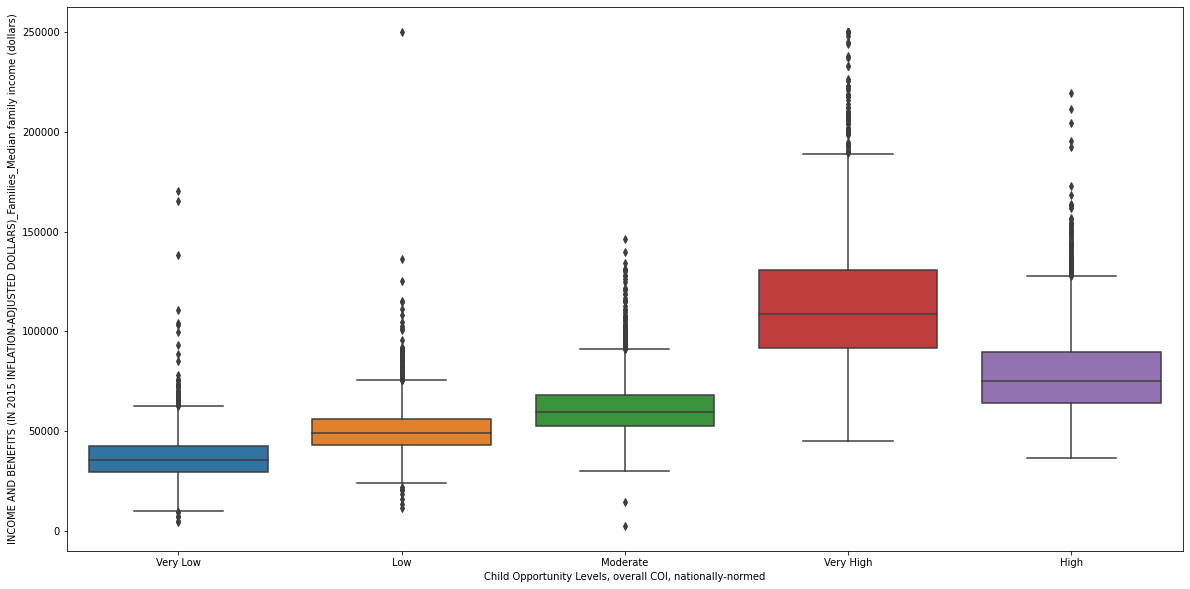

In [12]:
sns.boxplot(est['Child Opportunity Levels, overall COI, nationally-normed'], est['INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)_Families_Median family income (dollars)'])
plt.show()

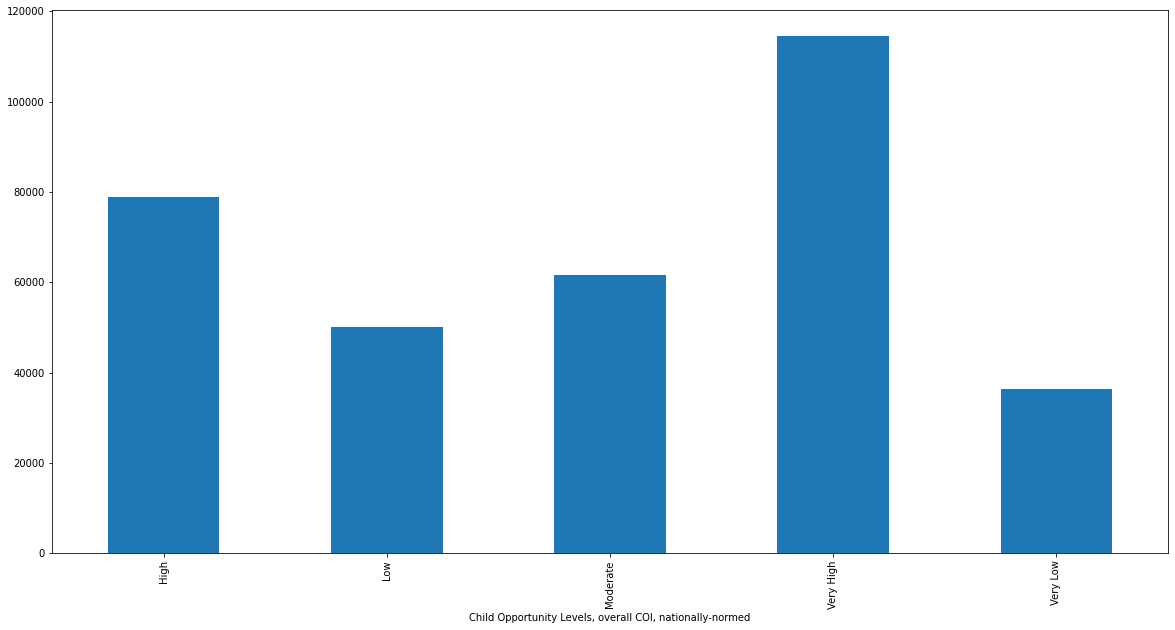

In [13]:
est.groupby('Child Opportunity Levels, overall COI, nationally-normed')['INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)_Families_Median family income (dollars)'].mean().plot.bar()
plt.show()